# Multivariate imputation with chained equations (MICE)

In this notebook, we will use regression models like linear regression, k-nearest neighbors regression, random forests regression, or Bayesian regression, to estimate the value of the missing observations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Load data

In [2]:
# List with the variables to load:

variables = ["A2", "A3", "A8", "A11", "A14", "A15", "target"]

# Load only necessary variables:
data = pd.read_csv("credit_approval_uci.csv", usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,target
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,NaN,1.50,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


## Split data into train and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("target", axis=1),
    data["target"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [4]:
# Find fraction of missing data:

X_train.isnull().mean()

A2     0.022774
A3     0.140787
A8     0.132505
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [5]:
# Set up a MICE imputer using Bayes regression
# to estimate the missing data:

imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0,
).set_output(transform="pandas")

In [6]:
# Train Bayes regression to estimate missing
# data in all variables:

imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [7]:
# Replace missing values by the
# regression estimates:

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

In [8]:
# The result is a NumPy array:

X_train_t.head()

,A2,A3,A8,A11,A14,A15
596,46.08,3.000,2.375,8.0,396.0,4159.0
303,15.92,2.875,0.085,0.0,120.0,0.0
204,36.33,2.125,0.085,1.0,50.0,1187.0
351,22.17,0.585,0.000,0.0,100.0,0.0
118,57.83,7.040,14.000,6.0,360.0,1332.0


In [9]:
# Corroborate that there is no missing data:

X_train_t.isnull().sum()

A2     11
A3     68
A8     64
A11     0
A14     7
A15     0
dtype: int64

## Compare to univariate imputation

In [10]:
# Set up multiple iterative imputer instances with
# different regression models:

imputer_simple = SimpleImputer(strategy="mean").set_output(transform="pandas")

X_train_s = imputer_simple.fit_transform(X_train)
X_test_s = imputer_simple.transform(X_test)

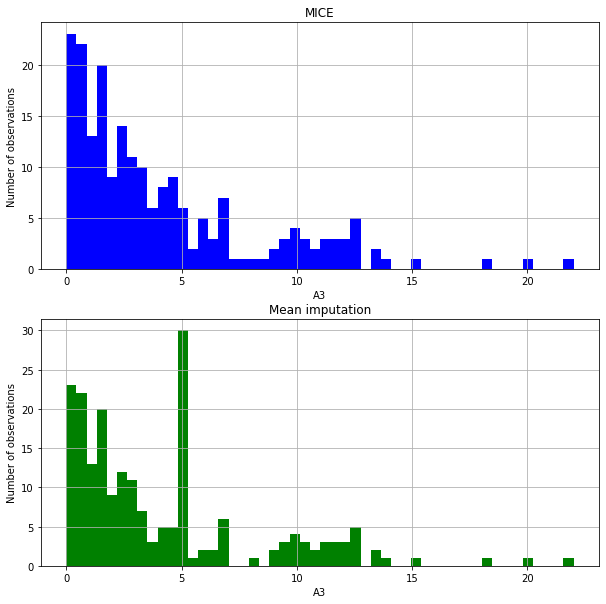

In [11]:
# Plot the original and imputed variable distributions:

fig, axes = plt.subplots(2, 1, figsize=(10, 10), squeeze=False)

X_test_t["A3"].hist(bins=50, ax=axes[0, 0], color="blue")
X_test_s["A3"].hist(bins=50, ax=axes[1, 0], color="green")

# add legends
axes[0, 0].set_ylabel('Number of observations')
axes[1, 0].set_ylabel('Number of observations')

axes[0, 0].set_xlabel('A3')
axes[1, 0].set_xlabel('A3')

axes[0, 0].set_title('MICE')
axes[1, 0].set_title('Mean imputation')

plt.show()

Note the high bar corresponding to the variable mean when we perform univariate imputation (green plot).